<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.411221,53.013147,54.402532,108.343567,320.170467,227.461676,92.708791
1,0.0,1.0,28.938610,26.561925,28.491017,43.081542,137.073094,83.198248,53.874846
2,0.0,2.0,26.325957,96.620437,99.639481,-20.395259,212.190617,283.784625,-71.594009
3,0.0,3.0,92.953662,47.589834,74.549904,54.516527,279.609927,224.620736,54.989191
4,0.0,4.0,78.364570,72.092164,28.380350,-13.971919,174.865166,240.648885,-65.783720
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.127925,38.093636,44.900109,-55.065695,61.055975,90.433320,-29.377345
59996,999.0,56.0,74.032957,56.119272,53.154222,130.349277,323.655729,171.581872,152.073857
59997,999.0,57.0,21.297985,40.059531,92.196508,50.930832,214.484856,121.260065,93.224790
59998,999.0,58.0,21.360695,55.599755,28.796491,27.317469,143.074409,66.446031,76.628378


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    94.411221  53.013147  54.402532  108.343567  320.170467   
      1.0    28.938610  26.561925  28.491017   43.081542  137.073094   
      2.0    26.325957  96.620437  99.639481  -20.395259  212.190617   
      3.0    92.953662  47.589834  74.549904   54.516527  279.609927   
      4.0    78.364570  72.092164  28.380350  -13.971919  174.865166   
...                ...        ...        ...         ...         ...   
999.0 55.0   23.127925  38.093636  44.900109  -55.065695   61.055975   
      56.0   74.032957  56.119272  53.154222  130.349277  323.655729   
      57.0   21.297985  40.059531  92.196508   50.930832  214.484856   
      58.0   21.360695  55.599755  28.796491   27.317469  143.074409   
      59.0   86.052547  21.712453  96.595702   15.769683  230.130386   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    227.461676   92.708791  
      1.0     83.198248   53.874846  
      2.0    283.784625  -71.594009  
      3.0    224.620736   54.989191  
      4.0    240.648885  -65.783720  
...                 ...         ...  
999.0 55.0    90.433320  -29.377345  
      56.0   171.581872  152.073857  
      57.0   121.260065   93.224790  
      58.0    66.446031   76.628378  
      59.0   241.613214  -11.482828  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    94.411221  53.013147  54.402532  108.343567  320.170467   
      1.0    28.938610  26.561925  28.491017   43.081542  137.073094   
      2.0    26.325957  96.620437  99.639481  -20.395259  212.190617   
      3.0    92.953662  47.589834  74.549904   54.516527  279.609927   
      4.0    78.364570  72.092164  28.380350  -13.971919  174.865166   
...                ...        ...        ...         ...         ...   
999.0 55.0   23.127925  38.093636  44.900109  -55.065695   61.055975   
      56.0   74.032957  56.119272  53.154222  130.349277  323.655729   
      57.0   21.297985  40.059531  92.196508   50.930832  214.484856   
      58.0   21.360695  55.599755  28.796491   27.317469  143.074409   
      59.0   86.052547  21.712453  96.595702   15.769683  230.130386   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    227.461676   92.708791  
      1.0     83.198248   53.874846  
      2.0    283.784625  -71.594009  
      3.0    224.620736   54.989191  
      4.0    240.648885  -65.783720  
...                 ...         ...  
999.0 55.0    90.433320  -29.377345  
      56.0   171.581872  152.073857  
      57.0   121.260065   93.224790  
      58.0    66.446031   76.628378  
      59.0   241.613214  -11.482828  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.411221,53.013147,54.402532,108.343567,320.170467,227.461676,92.708791
1,0.0,1.0,28.938610,26.561925,28.491017,43.081542,137.073094,83.198248,53.874846
2,0.0,2.0,26.325957,96.620437,99.639481,-20.395259,212.190617,283.784625,-71.594009
3,0.0,3.0,92.953662,47.589834,74.549904,54.516527,279.609927,224.620736,54.989191
4,0.0,4.0,78.364570,72.092164,28.380350,-13.971919,174.865166,240.648885,-65.783720
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.127925,38.093636,44.900109,-55.065695,61.055975,90.433320,-29.377345
59996,999.0,56.0,74.032957,56.119272,53.154222,130.349277,323.655729,171.581872,152.073857
59997,999.0,57.0,21.297985,40.059531,92.196508,50.930832,214.484856,121.260065,93.224790
59998,999.0,58.0,21.360695,55.599755,28.796491,27.317469,143.074409,66.446031,76.628378


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    94.411221  53.013147  54.402532  108.343567  320.170467   
      1.0    28.938610  26.561925  28.491017   43.081542  137.073094   
      2.0    26.325957  96.620437  99.639481  -20.395259  212.190617   
      3.0    92.953662  47.589834  74.549904   54.516527  279.609927   
      4.0    78.364570  72.092164  28.380350  -13.971919  174.865166   
...                ...        ...        ...         ...         ...   
999.0 55.0   23.127925  38.093636  44.900109  -55.065695   61.055975   
      56.0   74.032957  56.119272  53.154222  130.349277  323.655729   
      57.0   21.297985  40.059531  92.196508   50.930832  214.484856   
      58.0   21.360695  55.599755  28.796491   27.317469  143.074409   
      59.0   86.052547  21.712453  96.595702   15.769683  230.130386   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    227.461676   92.708791  
      1.0     83.198248   53.874846  
      2.0    283.784625  -71.594009  
      3.0    224.620736   54.989191  
      4.0    240.648885  -65.783720  
...                 ...         ...  
999.0 55.0    90.433320  -29.377345  
      56.0   171.581872  152.073857  
      57.0   121.260065   93.224790  
      58.0    66.446031   76.628378  
      59.0   241.613214  -11.482828  

[60000 rows x 7 columns]

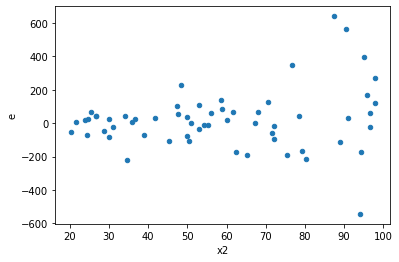

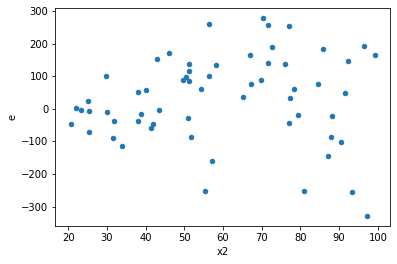

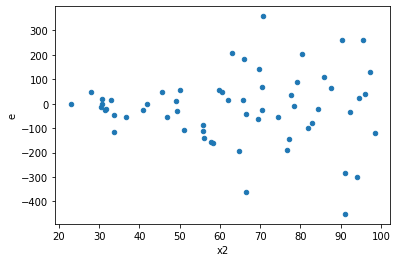

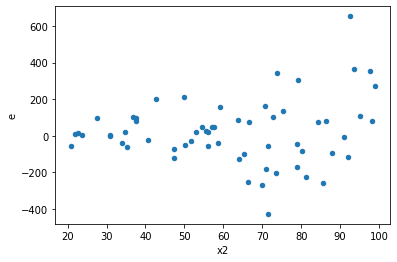

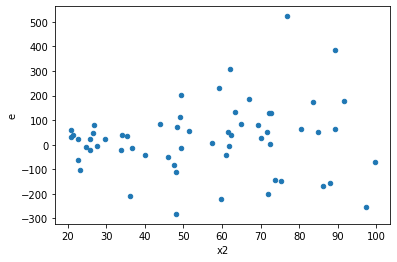

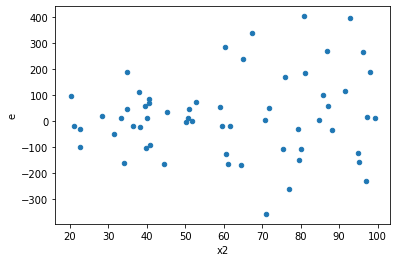

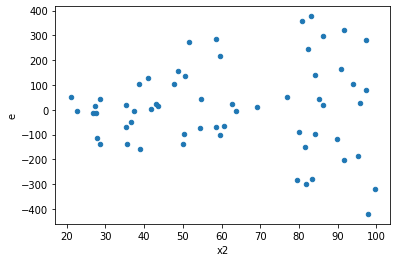

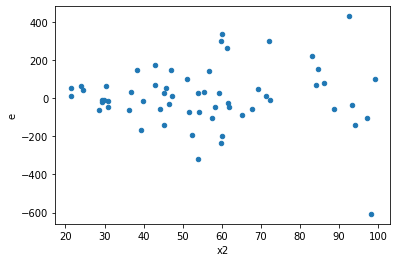

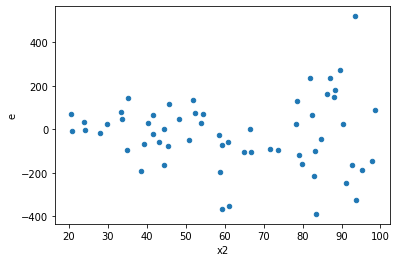

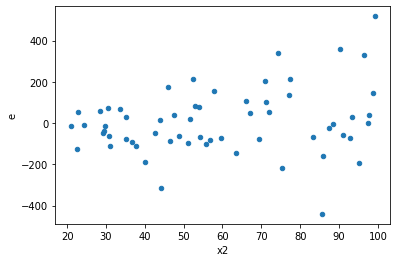

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,27.0,27.0,231185.90932617235,1448294.6891739652,8562.441086154531,53640.54404348019,6.264632188852892,8.760710353605816e-06,0.9999956196448232,4.380355176802908e-06,Reject001=0 : Heteroscedasticity
2.0,32.0,22.0,338442.3860111421,687130.361596224,10576.32456284819,31233.19825437382,2.953124033663615,0.01008177859270698,0.9949591107036465,0.00504088929635349,Reject001=1 : Homoscedasticity
3.0,24.0,30.0,422456.91828304325,1197994.009789414,17602.371595126802,39933.13365964713,2.268622352609723,0.03461623409180037,0.9826918829540998,0.017308117045900184,Reject001=1 : Homoscedasticity
4.0,34.0,20.0,486465.87840322533,597235.9598623215,14307.81995303604,29861.797993116073,2.0870962935747293,0.0851609782661309,0.9574195108669346,0.04258048913306545,Reject001=1 : Homoscedasticity
5.0,34.0,20.0,417574.9437999809,926585.2001289695,12281.615994117086,46329.26000644847,3.772244632028901,0.0026704510386548197,0.9986647744806726,0.0013352255193274098,Reject001=0 : Heteroscedasticity
12.0,33.0,21.0,221215.01028080803,913461.8240071257,6703.485160024486,43498.18209557742,6.488890637809442,3.395855692067684e-05,0.9999830207215397,1.697927846033842e-05,Reject001=0 : Heteroscedasticity
17.0,25.0,29.0,352496.4948291462,809051.112508955,14099.859793165848,27898.314224446724,1.9786235206373426,0.0785282030275456,0.9607358984862272,0.0392641015137728,Reject001=1 : Homoscedasticity
20.0,18.0,36.0,75339.62018670666,1241834.7580052356,4185.534454817036,34495.409944589876,8.241578301879679,1.0417845608401421e-07,0.999999947910772,5.208922804200711e-08,Reject001=0 : Heteroscedasticity
22.0,31.0,23.0,548882.1226810799,451849.6195599238,17705.874925196127,19645.635633040165,1.1095546374318779,0.8067874333846128,0.5966062833076936,0.4033937166923064,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,27.0,27.0,231185.90932617235,1448294.6891739652,8562.441086154531,53640.54404348019,6.264632188852892,8.760710353605816e-06,Reject001=0 : Heteroscedasticity
1.0,24.0,30.0,501468.19257953676,271558.7266521067,20894.508024147366,9051.957555070223,0.4332218564136115,0.0389077141302489,Reject001=1 : Homoscedasticity
2.0,32.0,22.0,338442.3860111421,687130.361596224,10576.32456284819,31233.19825437382,2.953124033663615,0.01008177859270698,Reject001=1 : Homoscedasticity
3.0,24.0,30.0,422456.91828304325,1197994.009789414,17602.371595126802,39933.13365964713,2.268622352609723,0.03461623409180037,Reject001=1 : Homoscedasticity
4.0,34.0,20.0,486465.87840322533,597235.9598623215,14307.81995303604,29861.797993116073,2.0870962935747293,0.0851609782661309,Reject001=1 : Homoscedasticity
5.0,34.0,20.0,417574.9437999809,926585.2001289695,12281.615994117086,46329.26000644847,3.772244632028901,0.0026704510386548197,Reject001=0 : Heteroscedasticity
6.0,33.0,21.0,1112948.2729225988,447631.10717521945,33725.70524007875,21315.767008343784,0.6320332475364424,0.23189685965678977,Reject001=1 : Homoscedasticity
7.0,37.0,17.0,1017042.5107586228,347723.8537207493,27487.635425908724,20454.344336514667,0.7441289154044599,0.44156074803998224,Reject001=1 : Homoscedasticity
8.0,32.0,22.0,864842.7009728798,591706.1469897861,27026.334405402493,26895.733954081184,0.9951676594627201,0.9708344011335844,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      656
Reject001=0 : Heteroscedasticity    344
Name: Result_test, dtype: int64